In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'dataset.csv'
# Detect the encoding of the file
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

In [3]:
# Use the detected encoding when reading the CSV file
df = pd.read_csv(file_path, encoding=result['encoding'])
df = df.sort_values('popularity', ascending=False).reset_index()
df = df.drop(['index', 'track_id'], axis=1)
df = df.drop(['explicit', 'track_genre'], axis=1)# not knowing purposes
df.index = df.index + 1
df = df[df.popularity > 0] # remove popularity = 0 

In [4]:
print(df.head())

   Unnamed: 0                  artists                             album_name  \
1       20001     Sam Smith;Kim Petras              Unholy (feat. Kim Petras)   
2       81051     Sam Smith;Kim Petras              Unholy (feat. Kim Petras)   
3       51664         Bizarrap;Quevedo  Quevedo: Bzrp Music Sessions, Vol. 52   
4       81210  David Guetta;Bebe Rexha                        I'm Good (Blue)   
5       89411            Manuel Turizo                             La Bachata   

                              track_name  popularity  duration_ms  \
1              Unholy (feat. Kim Petras)         100       156943   
2              Unholy (feat. Kim Petras)         100       156943   
3  Quevedo: Bzrp Music Sessions, Vol. 52          99       198937   
4                        I'm Good (Blue)          98       175238   
5                             La Bachata          98       162637   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
1         0.714   0.472

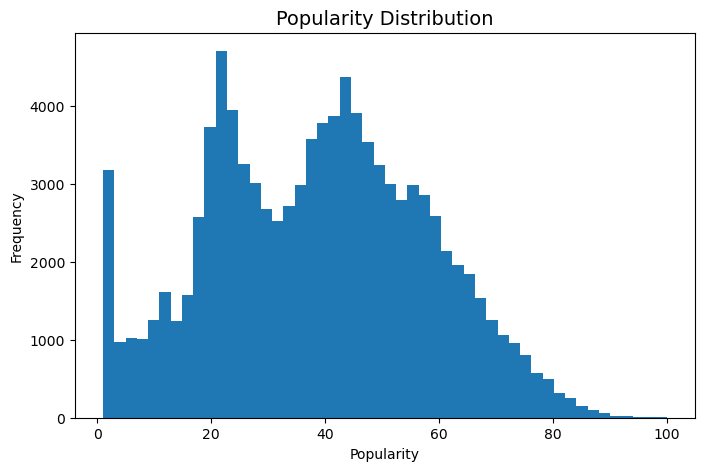

In [5]:
#---------------distribution of popularity.----------------
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = df['popularity'].plot(kind='hist', bins=50)
_ = plt.xlabel('Popularity')
_ = plt.title('Popularity Distribution', fontsize=14)
plt.show()

>>Due to the difficulty of obtaining satisfactory results directly predicting the popularity ranking, we divided the rankings into four categories: highly_popular, popular, intermediate, and unpopular. This segmentation serves as the final target for estimation. The basis for this segmentation is derived from the distribution of the popularity rankings:

In [6]:
#---------------statistical moments for the popularity column----------------
df[['popularity']].describe()
# highly_popular-0~25
# popular -26-40
# intermediate -41-55
# unpopular-55-100

popularity
count  97980.000000
mean      38.673127
std       19.201246
min        1.000000
25%       23.000000
50%       39.000000
75%       53.000000
max      100.000000

In [7]:
classified = df.copy()
classified['pop_target'] = ''

for i, row in classified.iterrows():
    score = 'unpopular'
    if (row.popularity > 40) & (row.popularity <= 55):
        score = 'intermediate'
    elif (row.popularity > 25) & (row.popularity <= 40):
        score = 'popular'
    elif row.popularity <=25:
        score = 'highly_popular'
    classified.at[i, 'pop_target'] = score

In [8]:
classified[['track_name', 'popularity', 'pop_target']].head(3)

track_name  popularity pop_target
1              Unholy (feat. Kim Petras)         100  unpopular
2              Unholy (feat. Kim Petras)         100  unpopular
3  Quevedo: Bzrp Music Sessions, Vol. 52          99  unpopular

> find relationships between popularity and other variables

In [9]:
def scat_plot(x, y, hue=None, xlab='', ylab='', titl=''):
    '''Plots a scatterplot using given inputs'''
    fig, ax = plt.subplots(figsize=(10,6))
    _ = sns.scatterplot(x, y, hue=hue, s=6)
    _ = plt.xlabel(xlab, fontsize=6)
    _ = plt.ylabel(ylab, fontsize=6)
    _ = plt.title(titl, fontsize=12)
    _ = plt.legend(fontsize=12)
    plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


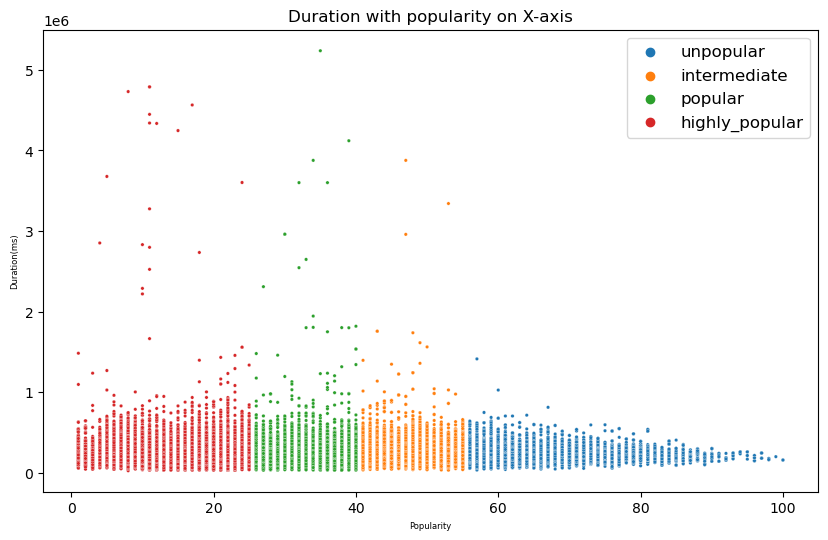

In [10]:
s = df
scat_plot(s.popularity, s.duration_ms, hue=classified.pop_target, xlab='Popularity',\
         ylab='Duration(ms)', titl='Duration with popularity on X-axis')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


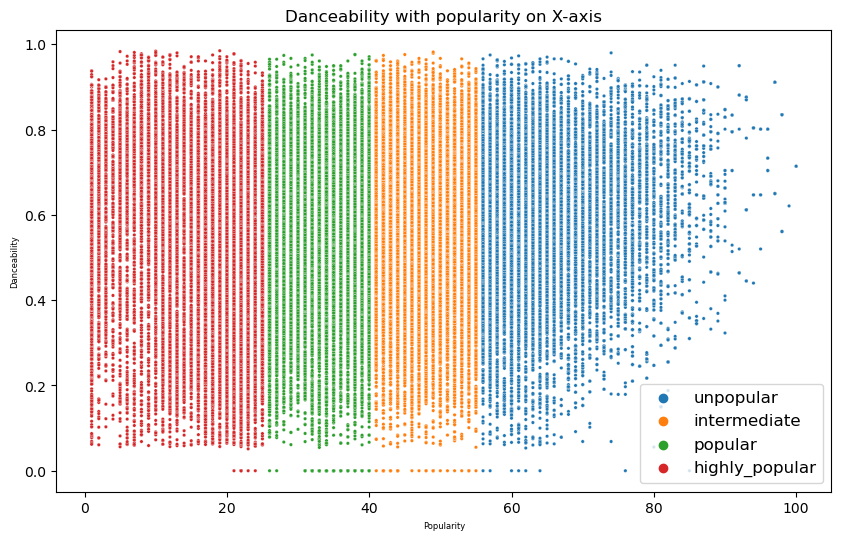

In [11]:
scat_plot(s.popularity, s.danceability, hue=classified.pop_target, xlab='Popularity',\
         ylab='Danceability', titl='Danceability with popularity on X-axis')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


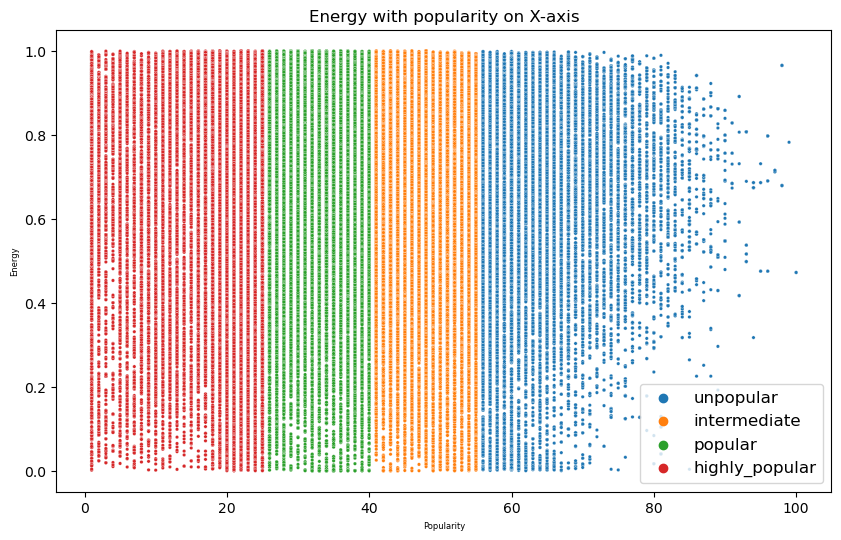

In [12]:
scat_plot(s.popularity, s.energy, hue=classified.pop_target, xlab='Popularity',\
         ylab='Energy', titl='Energy with popularity on X-axis')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


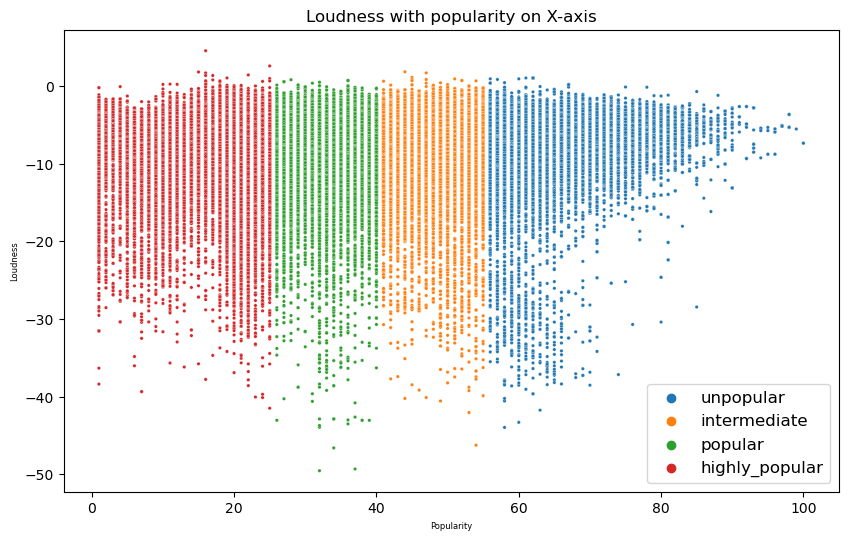

In [13]:
scat_plot(s.popularity, s.loudness, hue=classified.pop_target, xlab='Popularity',\
         ylab='Loudness', titl='Loudness with popularity on X-axis')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


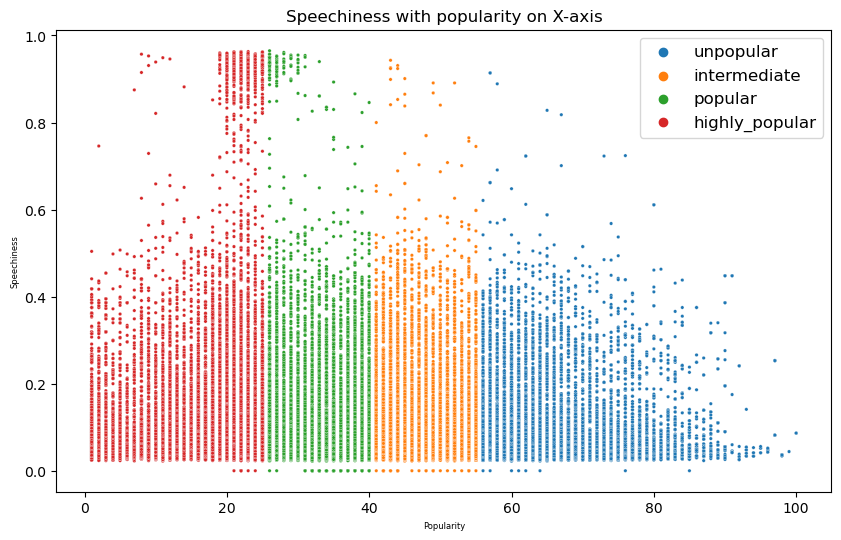

In [14]:
scat_plot(s.popularity, s.speechiness, hue=classified.pop_target, xlab='Popularity',\
         ylab='Speechiness', titl='Speechiness with popularity on X-axis')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


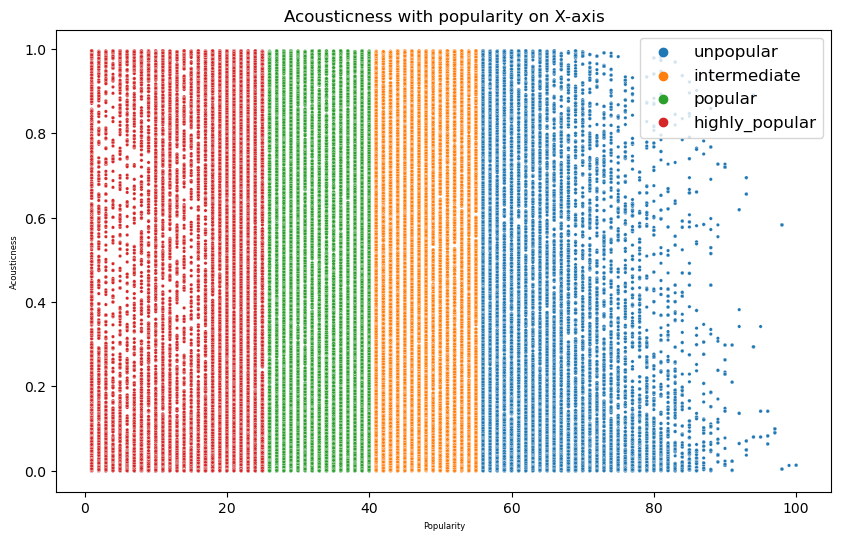

In [15]:
scat_plot(s.popularity, s.acousticness, hue=classified.pop_target, xlab='Popularity',\
         ylab='Acousticness', titl='Acousticness with popularity on X-axis')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


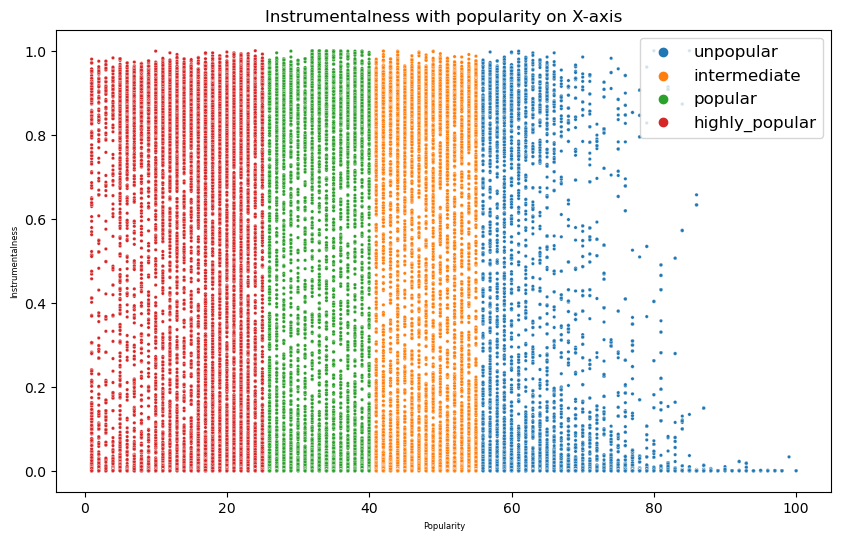

In [16]:
scat_plot(s.popularity, s.instrumentalness, hue=classified.pop_target, xlab='Popularity',\
         ylab='Instrumentalness', titl='Instrumentalness with popularity on X-axis')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


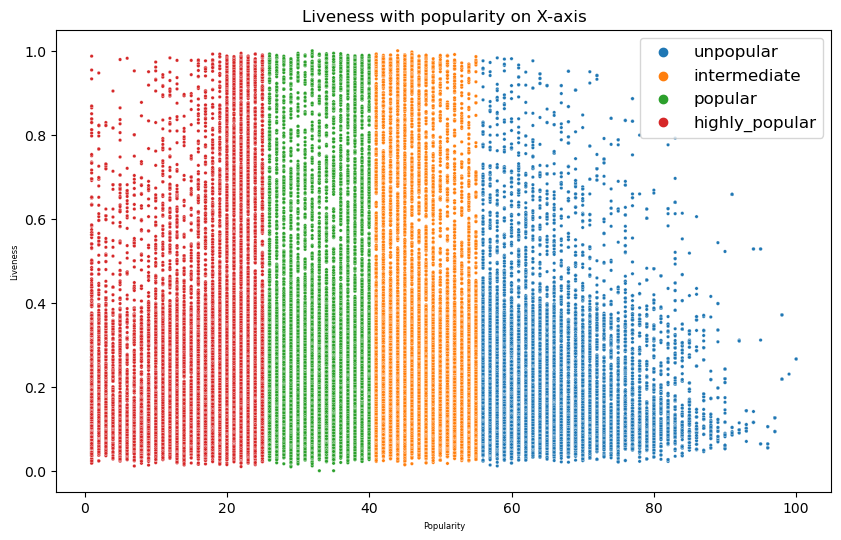

In [17]:
scat_plot(s.popularity, s.liveness, hue=classified.pop_target, xlab='Popularity',\
         ylab='Liveness', titl='Liveness with popularity on X-axis')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


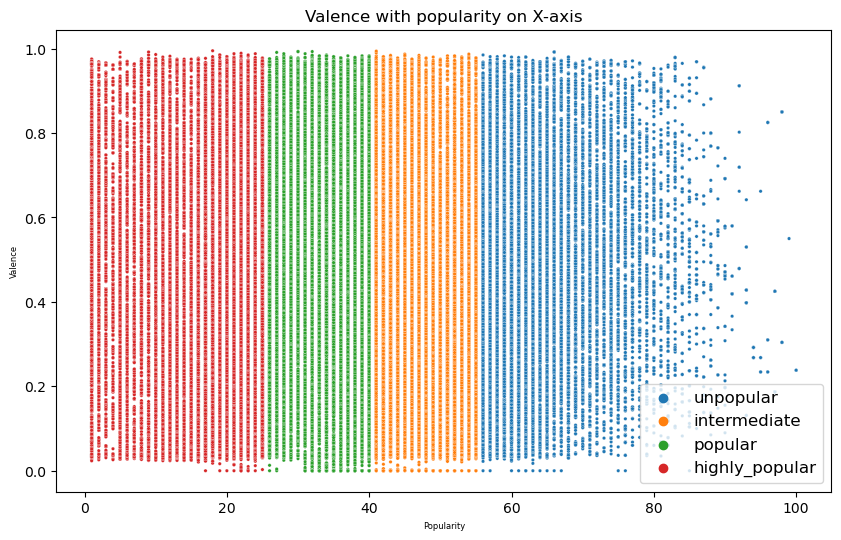

In [18]:
scat_plot(s.popularity, s.valence, hue=classified.pop_target, xlab='Popularity',\
         ylab='Valence', titl='Valence with popularity on X-axis')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


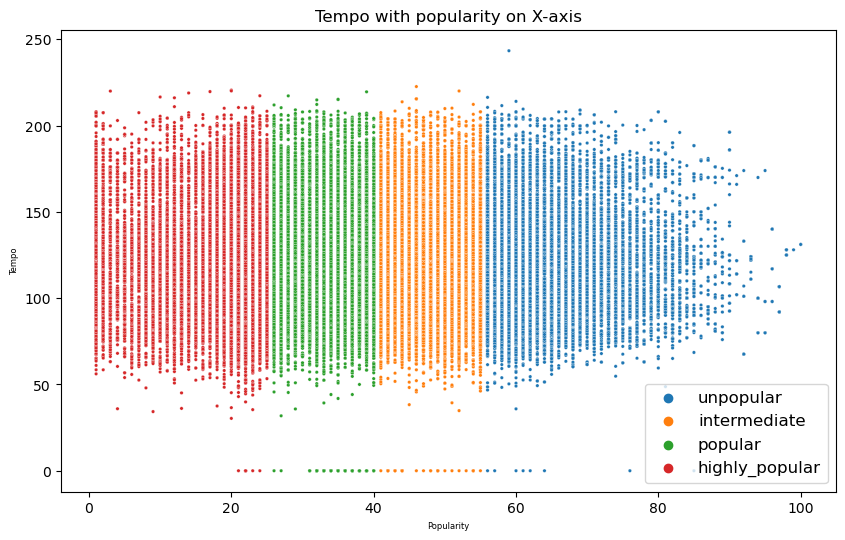

In [19]:
scat_plot(s.popularity, s.tempo, hue=classified.pop_target, xlab='Popularity',\
         ylab='Tempo', titl='Tempo with popularity on X-axis')

> The distribution above reveals a significant amount of noise and variability among the results. However, intuitively, songs that are considered popular may not necessarily share similar characteristics. Similarly, unpopular songs and popular songs can inherently exhibit various similarities.

In [20]:
# Split data 
X = classified.drop(['popularity', 'artists', 'album_name', 'track_name','pop_target'], axis=1)
y = classified['pop_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
from sklearn.metrics import accuracy_score

# Naive Bayes (Gaussian)
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()
# Fit the model to the training data
nb.fit(X_train, y_train)

# Make predictions on the test set
nb_pred = nb.predict(X_test)

# Evaluate the accuracy of the model
nb_accuracy = accuracy_score(nb_pred, y_test)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

Naive Bayes Accuracy: 0.3097


In [22]:
# Naive Bayes(Bernoulli)
from sklearn.naive_bayes import BernoulliNB

# Create a Bernoulli Naive Bayes classifier
nb = BernoulliNB()
# Fit the model to the training data
nb.fit(X_train, y_train)

# Make predictions on the test set
nb_pred = nb.predict(X_test)

# Evaluate the accuracy of the model
nb_accuracy = accuracy_score(nb_pred, y_test)
print(f"Naive Bayes (Bernoulli) Accuracy: {nb_accuracy:.4f}")

Naive Bayes (Bernoulli) Accuracy: 0.3210


In [23]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create Basic decision tree classifier
dt = DecisionTreeClassifier(max_depth=20, random_state=42)
# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test set
pred = dt.predict(X_test)

# Evaluate the accuracy of the model
dt_accuracy = accuracy_score(pred, y_test)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
#print(accuracy_score(pred, y_test))

Decision Tree Accuracy: 0.6662


In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create an Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
rf_accuracy = accuracy_score(rf_pred, y_test)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.6920


In [25]:
# AdaBoost:decision tree
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier
dt_b = DecisionTreeClassifier(max_depth=20, random_state=42)
adb = AdaBoostClassifier(base_estimator=dt_b, n_estimators=200)
# Fit the model to the training data
adb.fit(X_train, y_train)

# Make predictions on the test set
adb_pred = adb.predict(X_test)

# Evaluate the accuracy of the model
adb_accuracy = accuracy_score(adb_pred, y_test)
print(f"AdaBoost Accuracy: {adb_accuracy:.4f}")

AdaBoost Accuracy: 0.6662


In [26]:
# AdaBoost:random forest

# Create an AdaBoost classifier
rf_b = RandomForestClassifier(n_estimators=100, random_state=42)
adb_rf = AdaBoostClassifier(base_estimator=rf_b, n_estimators=200)
# Fit the model to the training data
adb_rf.fit(X_train, y_train)

# Make predictions on the test set
adb_rf_pred = adb_rf.predict(X_test)

# Evaluate the accuracy of the model
adb_rf_accuracy = accuracy_score(adb_rf_pred, y_test)
print(f"AdaBoost(random forest) Accuracy: {adb_rf_accuracy:.4f}")

AdaBoost(random forest) Accuracy: 0.7035


In [27]:
# XGBoost
! pip install xgboost
from xgboost import XGBClassifier

In [28]:
y_label = ['unpopular', 'intermediate', 'popular', 'highly_popular']

from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_label)
y_train_encoded = label_encoder.transform(y_train)

# Create an XGBoost classifier
xgb = XGBClassifier(max_depth=10, n_estimators=200, random_state=42)

# Fit the model to the training data using the encoded labels
xgb.fit(X_train, y_train_encoded)

# Make predictions on the test set
xgb_pred_encoded = xgb.predict(X_test)

# Decode the predicted labels back to original labels
xgb_pred = label_encoder.inverse_transform(xgb_pred_encoded)

# Evaluate the accuracy of the model using the original labels
xgb_accuracy = accuracy_score(xgb_pred, y_test)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

XGBoost Accuracy: 0.7419


In [ ]:
# SVM(使用linear核心函數)
from sklearn.svm import SVC

# Create an SVM classifier with linear kernel
svm = SVC(kernel='linear', random_state=42)
# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test set
svm_pred = svm.predict(X_test)

# Evaluate the accuracy of the model
svm_accuracy = accuracy_score(svm_pred, y_test)
print(f"SVM (RBF Kernel) Accuracy: {svm_accuracy:.4f}")

In [ ]:
# SVM(使用polynomial核心函數)
from sklearn.svm import SVC

# Create an SVM classifier with poly kernel
svm = SVC(kernel='poly', random_state=42)
# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test set
svm_pred = svm.predict(X_test)

# Evaluate the accuracy of the model
svm_accuracy = accuracy_score(svm_pred, y_test)
print(f"SVM (poly Kernel) Accuracy: {svm_accuracy:.4f}")

In [ ]:
# SVM(使用sigmoid核心函數)
from sklearn.svm import SVC

# Create an SVM classifier with sigmoid kernel
svm = SVC(kernel='sigmoid', random_state=42)
# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test set
svm_pred = svm.predict(X_test)

# Evaluate the accuracy of the model
svm_accuracy = accuracy_score(svm_pred, y_test)
print(f"SVM (sigmoid Kernel) Accuracy: {svm_accuracy:.4f}")

> SVM doesn't seem to work well(though switching to different kernel)

In [ ]:
# SVM(使用RBF核心函數)
from sklearn.svm import SVC

# Create an SVM classifier with RBF kernel
svm = SVC(kernel='rbf', random_state=42)
# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test set
svm_pred = svm.predict(X_test)

# Evaluate the accuracy of the model
svm_accuracy = accuracy_score(svm_pred, y_test)
print(f"SVM (RBF Kernel) Accuracy: {svm_accuracy:.4f}")

> This success one time, but the result was also quite poor, approximately around 0.3

> use StratifiedKFold

In [29]:
from sklearn.model_selection import StratifiedKFold

# Define the number of folds for StratifiedKFold
n_splits = 5  # You can adjust the number of splits based on your preference

In [31]:
# Naive Bayes (Gaussian)

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
accuracy_scores = []

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model to the training data
    nb.fit(X_train, y_train)

    # Make predictions on the test set
    nb_pred = nb.predict(X_test)

    # Evaluate the accuracy of the model for this fold
    fold_accuracy = accuracy_score(nb_pred, y_test)
    accuracy_scores.append(fold_accuracy)

# Calculate and print the average accuracy over all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Naive Bayes Accuracy: {average_accuracy:.4f}")

Average Naive Bayes Accuracy: 0.3089


In [32]:
# Naive Bayes(Bernoulli)

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
accuracy_scores = []

# Create a Bernoulli Naive Bayes classifier
nb = BernoulliNB()

# Perform StratifiedKFold cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model to the training data
    nb.fit(X_train, y_train)

    # Make predictions on the test set
    nb_pred = nb.predict(X_test)

    # Evaluate the accuracy of the model for this fold
    fold_accuracy = accuracy_score(nb_pred, y_test)
    accuracy_scores.append(fold_accuracy)

# Calculate and print the average accuracy over all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Naive Bayes (Bernoulli) Accuracy: {average_accuracy:.4f}")

Average Naive Bayes (Bernoulli) Accuracy: 0.3198


In [33]:
# Decision Tree

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
accuracy_scores = []

# Create Basic decision tree classifier
dt = DecisionTreeClassifier(max_depth=20, random_state=42)

# Perform StratifiedKFold cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model to the training data
    dt.fit(X_train, y_train)

    # Make predictions on the test set
    pred = dt.predict(X_test)

    # Evaluate the accuracy of the model for this fold
    fold_accuracy = accuracy_score(pred, y_test)
    accuracy_scores.append(fold_accuracy)

# Calculate and print the average accuracy over all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Decision Tree Accuracy: {average_accuracy:.4f}")

Average Decision Tree Accuracy: 0.6736


In [34]:
# Random Forest

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
accuracy_scores = []

# Create an Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform StratifiedKFold cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model to the training data
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    rf_pred = rf.predict(X_test)

    # Evaluate the accuracy of the model for this fold
    fold_accuracy = accuracy_score(rf_pred, y_test)
    accuracy_scores.append(fold_accuracy)

# Calculate and print the average accuracy over all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Random Forest Accuracy: {average_accuracy:.4f}")

Average Random Forest Accuracy: 0.6966


In [35]:
y_label = ['unpopular', 'intermediate', 'popular', 'highly_popular']

from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_label)
y_encoded = label_encoder.transform(y)

# Create an XGBoost classifier
xgb = XGBClassifier(max_depth=10, n_estimators=200, random_state=42)

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
accuracy_scores = []

# Perform StratifiedKFold cross-validation
for train_index, test_index in stratified_kfold.split(X, y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_encoded, y_test_encoded = y_encoded[train_index], y_encoded[test_index]

    # Fit the model to the training data
    xgb.fit(X_train, y_train_encoded)

    # Make predictions on the test set
    xgb_pred_encoded = xgb.predict(X_test)

    # Decode the predicted labels back to original labels
    xgb_pred = label_encoder.inverse_transform(xgb_pred_encoded)

    # Evaluate the accuracy of the model for this fold
    fold_accuracy = accuracy_score(xgb_pred, label_encoder.inverse_transform(y_test_encoded))
    accuracy_scores.append(fold_accuracy)

# Calculate and print the average accuracy over all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average XGBoost Accuracy: {average_accuracy:.4f}")

Average XGBoost Accuracy: 0.7450


>Stratified K Fold Cross Validation output didn't get significant improvement, maybe it is not the problem of dividing train set/ test set

| Model                               | Accuracy             |
| ----------------------------------- | -------------------- |
| Naive Bayes                         | 0.3097               |
| Naive Bayes (Bernoulli)             | 0.3210               |
| Decision Tree                       | 0.6662               |
| Random Forest                       | 0.6920               |
| AdaBoost (Decision Tree)            | 0.6662               |
| AdaBoost (Random Forest)            | 0.7035               |
| XGBoost                             | 0.7419               |

**StratifiedKFold Average Accuracy:**

| Model                               | Average Accuracy     |
| ----------------------------------- | -------------------- |
| Naive Bayes                         | 0.3089               |
| Naive Bayes (Bernoulli)             | 0.3198               |
| Decision Tree                       | 0.6736               |
| Random Forest                       | 0.6966               |
| XGBoost                             | 0.7450               |